<a href="https://colab.research.google.com/github/IAMJASURBEK/AIapplicationSystem/blob/main/Week%236_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np


In [ ]:
import tensorflow as tf


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
learning_parameter = 0.01
epochs = 300

In [ ]:
sample_points = 50
x_train = np.linspace(0,30,sample_points)
y_train = 6*x_train + 7*np.random.randn(sample_points)

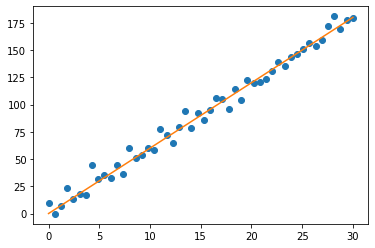

In [ ]:
plt.plot(x_train,y_train,'o')
plt.plot(x_train,6*x_train)
plt.show()

In [ ]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


In [ ]:
Y = tf.placeholder(tf.float32)

In [ ]:
X = tf.placeholder(tf.float32)

In [ ]:

W = tf.Variable(np.random.randn(), name = 'weights')
B = tf.Variable(np.random.randn(), name = 'bias')

In [ ]:
prediction = W*X + B

cost_iteration = tf.reduce_sum((prediction-Y)**2)/(2*sample_points)

In [ ]:
optimizer = tf.train.GradientDescentOptimizer(learning_parameter).minimize(cost_iteration)

init = tf.global_variables_initializer()

Epochs 0.000000 Cost 0.250421 Weight 5.849896 Bias -1.454257
Epochs 40.000000 Cost 0.038810 Weight 6.070312 Bias -1.092515
Epochs 80.000000 Cost 0.036935 Weight 6.058258 Bias -0.779059
Epochs 120.000000 Cost 0.035277 Weight 6.047341 Bias -0.495215
Epochs 160.000000 Cost 0.033807 Weight 6.037456 Bias -0.238186
Epochs 200.000000 Cost 0.032504 Weight 6.028505 Bias -0.005439
Epochs 240.000000 Cost 0.031345 Weight 6.020399 Bias 0.205320
Epochs 280.000000 Cost 0.030315 Weight 6.013060 Bias 0.396168


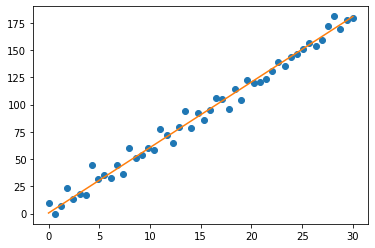

In [ ]:
with tf.Session() as sess:
  sess.run(init)
  for epoch in range(epochs):
    for x,y in zip(x_train, y_train):
      sess.run(optimizer, feed_dict = {X:x, Y:y})
    if not epoch%40:
      W1 = sess.run(W)
      B1 = sess.run(B)
      cost_iter = sess.run(cost_iteration, feed_dict = {X:x, Y:y})
      print('Epochs %f Cost %f Weight %f Bias %f' %(epoch,cost_iter,W1,B1))
  Weight = sess.run(W) 
  Bias = sess.run(B)   

  plt.plot(x_train, y_train,'o')
  plt.plot(x_train, Weight*x_train +Bias)
  plt.show()


In [ ]:
with tf.name_scope("Model") as scope:
  prediction = W*X + B


weight_histtogram = tf.summary.histogram("Weights", W)
bias_histtogram = tf.summary.histogram("Bias", B)

with tf.name_scope("Cost_function") as scope:
  cost_iteration = tf.reduce_sum((prediction - Y)**2)/(2*sample_points)
cost_summary = tf.summary.scalar("Cost", cost_iteration)

with tf.name_scope("Training") as scope:  
  optimizer = tf.train.GradientDescentOptimizer(learning_parameter).minimize(cost_iteration)


init = tf.global_variables_initializer()

merged_summary = tf.summary.merge_all()


Epochs 0.000000 Cost 0.250421 Weight 5.849896 Bias -1.454257
Epochs 40.000000 Cost 0.038810 Weight 6.070312 Bias -1.092515
Epochs 80.000000 Cost 0.036935 Weight 6.058258 Bias -0.779059
Epochs 120.000000 Cost 0.035277 Weight 6.047341 Bias -0.495215
Epochs 160.000000 Cost 0.033807 Weight 6.037456 Bias -0.238186
Epochs 200.000000 Cost 0.032504 Weight 6.028505 Bias -0.005439
Epochs 240.000000 Cost 0.031345 Weight 6.020399 Bias 0.205320
Epochs 280.000000 Cost 0.030315 Weight 6.013060 Bias 0.396168


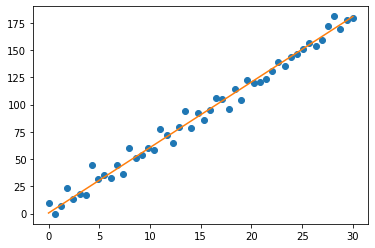

In [ ]:
with tf.Session() as sess:
  sess.run(init)
  writer = tf.summary.FileWriter('./log',sess.graph)
  for epoch in range(epochs):
    for x,y in zip(x_train, y_train):
      sess.run(optimizer, feed_dict = {X:x, Y:y})

      summary_epochs = sess.run(merged_summary, feed_dict = {X:x, Y:y})
      writer.add_summary(summary_epochs,epoch)


    if not epoch%40:
      W1 = sess.run(W)
      B1 = sess.run(B)
      cost_iter = sess.run(cost_iteration, feed_dict = {X:x, Y:y})
      print('Epochs %f Cost %f Weight %f Bias %f' %(epoch,cost_iter,W1,B1))
  Weight = sess.run(W) 
  Bias = sess.run(B)   

  plt.plot(x_train, y_train,'o')
  plt.plot(x_train, Weight*x_train +Bias)
  plt.show()

# Новый раздел

Epochs 0.000000 Cost 0.250421 Weight 5.849896 Bias -1.454257
Epochs 40.000000 Cost 0.038810 Weight 6.070312 Bias -1.092515
Epochs 80.000000 Cost 0.036935 Weight 6.058258 Bias -0.779059
Epochs 120.000000 Cost 0.035277 Weight 6.047341 Bias -0.495215
Epochs 160.000000 Cost 0.033807 Weight 6.037456 Bias -0.238186
Epochs 200.000000 Cost 0.032504 Weight 6.028505 Bias -0.005439
Epochs 240.000000 Cost 0.031345 Weight 6.020399 Bias 0.205320
Epochs 280.000000 Cost 0.030315 Weight 6.013060 Bias 0.396168


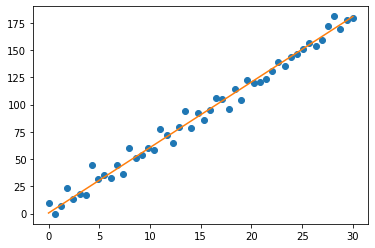

In [ ]:
with tf.Session() as sess:
  sess.run(init)
  writer = tf.summary.FileWriter('./log', sess.graph)
  for epoch in range(epochs):
    for x, y in zip(x_train, y_train):
      sess.run(optimizer, feed_dict = {X : x, Y : y})

      # Write logs for each epochs
      summary_epochs = sess.run(merged_summary, feed_dict={X : x, Y : y})
      writer.add_summary(summary_epochs, epoch)
    if not epoch%40:
      W1 = sess.run(W)
      B1 = sess.run(B)
      cost_iter = sess.run(cost_iteration, feed_dict = {X : x, Y : y})
      print('Epochs %f Cost %f Weight %f Bias %f' %(epoch, cost_iter, W1, B1))
  Weight = sess.run(W)
  Bias = sess.run(B)

  plt.plot(x_train, y_train, 'o')
  plt.plot(x_train,Weight*x_train+Bias)
  plt.show()

In [1]:
pip install tensorflow==1.15.5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 110.5 MB 1.4 kB/s 
     |████████████████████████████████| 503 kB 41.4 MB/s 
     |████████████████████████████████| 3.8 MB 34.5 MB/s 
     |████████████████████████████████| 2.9 MB 25.3 MB/s 
     |████████████████████████████████| 50 kB 2.8 MB/s 
     |████████████████████████████████| 20.1 MB 1.3 MB/s 
  Created wheel for gast: filename=gast-0.2.2-py3-none-any.whl size=7554 sha256=fb6bc2f226c7f2fe7981fc71c4f6550f53e76c1ff73aeb97a2767c3d4c0c9b2b
  Stored in directory: /root/.cache/pip/wheels/21/7f/02/420f32a803f7d0967b48dd823da3f558c5166991bfd204eef3
Successfully built gast
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.6
    Uninstalling numpy-1.21.6:
      Successfully uninstalled numpy-1.21.6
  Attempting uninstall: h5py
    Found existing installation: h5py 3.1.0
    Uninstalling h5py-3.1.0:
      Successfully uninst

In [1]:
!wget https://bin.equinox.io/c/bNyj1mQVY4c/ngrok-v3-stable-freebsd-amd64.tgz

--2022-10-05 06:06:07--  https://bin.equinox.io/c/bNyj1mQVY4c/ngrok-v3-stable-freebsd-amd64.tgz
Resolving bin.equinox.io (bin.equinox.io)... 54.161.241.46, 18.205.222.128, 52.202.168.65, ...
Connecting to bin.equinox.io (bin.equinox.io)|54.161.241.46|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8380303 (8.0M) [application/octet-stream]
Saving to: ‘ngrok-v3-stable-freebsd-amd64.tgz’

ngrok-v3-stable-fre 100%[===================>]   7.99M  4.82MB/s    in 1.7s    

2022-10-05 06:06:09 (4.82 MB/s) - ‘ngrok-v3-stable-freebsd-amd64.tgz’ saved [8380303/8380303]



In [4]:
!unzip ngrok-v3-stable-freebsd-amd64.tgz

Archive:  ngrok-v3-stable-freebsd-amd64.tgz
  End-of-central-directory signature not found.  Either this file is not
  a zipfile, or it constitutes one disk of a multi-part archive.  In the
  latter case the central directory and zipfile comment will be found on
  the last disk(s) of this archive.
unzip:  cannot find zipfile directory in one of ngrok-v3-stable-freebsd-amd64.tgz or
        ngrok-v3-stable-freebsd-amd64.tgz.zip, and cannot find ngrok-v3-stable-freebsd-amd64.tgz.ZIP, period.


In [5]:
LOG_DIR = './log'
get_ipython().system_raw(
    'tensorboard --logdir {} --host 0.0.0.0 --port 6006 &'
    .format(LOG_DIR)
)

In [6]:
get_ipython().system_raw('./ngrok http 6006 &')

In [7]:
! curl -s http://localhost:4040/api/tunnels | python3 -c \
    "import sys, json; print(json.load(sys.stdin)['tunnels'][0]['public_url'])"

Traceback (most recent call last):
  File "<string>", line 1, in <module>
  File "/usr/lib/python3.7/json/__init__.py", line 296, in load
    parse_constant=parse_constant, object_pairs_hook=object_pairs_hook, **kw)
  File "/usr/lib/python3.7/json/__init__.py", line 348, in loads
    return _default_decoder.decode(s)
  File "/usr/lib/python3.7/json/decoder.py", line 337, in decode
    obj, end = self.raw_decode(s, idx=_w(s, 0).end())
  File "/usr/lib/python3.7/json/decoder.py", line 355, in raw_decode
    raise JSONDecodeError("Expecting value", s, err.value) from None
json.decoder.JSONDecodeError: Expecting value: line 1 column 1 (char 0)


In [8]:
pip install tensorflow==1.15.5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [9]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

In [10]:
from tensorflow.examples.tutorials.mnist import input_data
mnist_data = input_data.read_data_sets("./data", one_hot = True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Instructions for updating:
Please use tf.data to implement this functionality.


Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting ./data/train-images-idx3-ubyte.gz


Instructions for updating:
Please use tf.data to implement this functionality.
Instructions for updating:
Please use tf.one_hot on tensors.


Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting ./data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting ./data/t10k-images-idx3-ubyte.gz


Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting ./data/t10k-labels-idx1-ubyte.gz


In [11]:
num_training = mnist_data.train.num_examples
num_testing = mnist_data.test.num_examples
num_validation = mnist_data.validation.num_examples
print("MNIST Datasize: Training samples: {0}, Testing samples: {1}")

MNIST Datasize: Training samples: {0}, Testing samples: {1}


In [12]:
n_input = 784     # Input image of size 28 x 28
n_hidden_1 = 512  # First hidden layer
n_hidden_2 = 256  # Second hidden layer
n_hidden_3 = 128  # Third hidden layer
n_output = 10 

In [13]:
learning_rate = 1e-4
epochs = 3000
batch_size = 128
keep_prob = tf.placeholder(tf.float32)

In [14]:
X = tf.placeholder(tf.float32, [None, n_input])
Y = tf.placeholder(tf.float32, [None, n_output])

In [15]:
nn_weight = {"W1": tf.Variable(tf.truncated_normal([n_input, n_hidden_1], stddev = 0.1)),
             "W2": tf.Variable(tf.truncated_normal([n_hidden_1, n_hidden_2], stddev = 0.1)),
             "W3": tf.Variable(tf.truncated_normal([n_hidden_2, n_hidden_3], stddev = 0.1)),
             "Wout":tf.Variable(tf.truncated_normal([n_hidden_3, n_output]))
}

nn_bias = { "B1": tf.Variable(tf.truncated_normal([n_hidden_1])),
            "B2": tf.Variable(tf.truncated_normal([n_hidden_2])),
            "B3": tf.Variable(tf.truncated_normal([n_hidden_3])),
            "B4": tf.Variable(tf.truncated_normal([n_output])),  
           }

In [16]:
nn_layer_1 = tf.add(tf.matmul(X, nn_weight["W1"]),nn_bias["B1"])
nn_layer_2 = tf.add(tf.matmul(nn_layer_1, nn_weight["W2"]),nn_bias["B2"])
nn_layer_3 = tf.add(tf.matmul(nn_layer_2, nn_weight["W3"]),nn_bias["B3"])
layer_drop = tf.nn.dropout(nn_layer_3, keep_prob)
output_layer = tf.add(tf.matmul(layer_drop, nn_weight["Wout"]), nn_bias["B4"])

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [17]:
computed_loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits = output_layer, labels = Y))

# Define the optimizer
optimizer = tf.train.GradientDescentOptimizer(learning_rate = learning_rate).minimize(computed_loss)

#Define prediction
prediction_out = tf.equal(tf.argmax(output_layer,1), tf.argmax(Y,1))

# Define accuracy of the model
nn_accuracy = tf.reduce_mean(tf.cast(prediction_out, tf.float32))

# Initialize all the variables
init = tf.global_variables_initializer()

saver = tf.train.Saver()

In [18]:
with tf.Session() as sess:
  sess.run(init)
  for i in range(epochs):

    mini_batch_x, mini_batch_y = mnist_data.train.next_batch(batch_size)
    #print(mini_batch_x[0:1,:].shape)
    mini_batch_val_x, mini_batch_val_y = mnist_data.validation.next_batch(batch_size)

    sess.run(optimizer, feed_dict = {X : mini_batch_x, Y : mini_batch_y, keep_prob:1})
    
    if i%100 == 0:
      mini_batch_loss, mini_batch_accuracy = sess.run([computed_loss, nn_accuracy], feed_dict = {X: mini_batch_x, Y: mini_batch_y, keep_prob:1})

      mini_batch_val_loss, mini_batch_val_accuracy = sess.run([computed_loss, nn_accuracy], feed_dict = {X: mini_batch_x, Y: mini_batch_y, keep_prob:1})

      print("Iterations : {0} , Train_loss = {1}, Train_Accuracy {2}, Val_loss {3}, Val_accuracy {4}".format(i, mini_batch_loss, mini_batch_accuracy, mini_batch_val_loss, mini_batch_val_accuracy))

  print("Optimization Finished")
  test_accuracy = sess.run(nn_accuracy, feed_dict = {X:mnist_data.test.images, Y:mnist_data.test.labels, keep_prob:1.0})
  print("Testing accuracy is {0}".format(test_accuracy))

  saver_path = saver.save(sess, "./model/my_model.ckpt")

Iterations : 0 , Train_loss = 48.473052978515625, Train_Accuracy 0.1015625, Val_loss 48.473052978515625, Val_accuracy 0.1015625
Iterations : 100 , Train_loss = 9.285032272338867, Train_Accuracy 0.4375, Val_loss 9.285032272338867, Val_accuracy 0.4375
Iterations : 200 , Train_loss = 5.558805465698242, Train_Accuracy 0.5625, Val_loss 5.558805465698242, Val_accuracy 0.5625
Iterations : 300 , Train_loss = 3.6109461784362793, Train_Accuracy 0.6640625, Val_loss 3.6109461784362793, Val_accuracy 0.6640625
Iterations : 400 , Train_loss = 2.932126998901367, Train_Accuracy 0.7265625, Val_loss 2.932126998901367, Val_accuracy 0.7265625
Iterations : 500 , Train_loss = 1.8402321338653564, Train_Accuracy 0.7421875, Val_loss 1.8402321338653564, Val_accuracy 0.7421875
Iterations : 600 , Train_loss = 2.82607102394104, Train_Accuracy 0.703125, Val_loss 2.82607102394104, Val_accuracy 0.703125
Iterations : 700 , Train_loss = 2.93996000289917, Train_Accuracy 0.7578125, Val_loss 2.93996000289917, Val_accuracy 

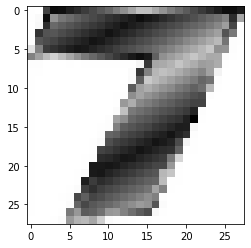

Prediction for test image is [0]


In [22]:
img = cv2.imread("se7.jpg")
gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

rescaled_image = cv2.resize(gray_image, (28,28))
plt.imshow(rescaled_image, cmap = 'gray')
plt.show()
rescaled_image.shape
#test_image = rescaled_image.flatten()

dum = rescaled_image.reshape(1,-1)/255
dum.shape
with tf.Session() as sess:
  saver.restore(sess, "./model/my_model.ckpt")
  Z = output_layer.eval(feed_dict = {X:dum, keep_prob:1.0})
  y_pred = np.argmax(Z, axis = 1)
  print("Prediction for test image is {0}".format(y_pred))